# Classification of Galaxy, Stars and Quasars

The dataset were taken from Kaggle: https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey. The aim of this project is to build a model using various technique such as SVM and Neural Network. The outcome were satisfactory as aside from this notebook, an exhaustive CHAID Decision Tree were also used, with an accuracy of 96%. 

In [1]:
import pandas as pd
import numpy as np 
from sklearn import svm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import plotly
plotly.tools.set_credentials_file(username='GeorgeWong', api_key='weDXTSLk2Wvq0R7Ye9YM')
import plotly.plotly as py
import plotly.figure_factory as ff
from fbprophet import Prophet
import plotly.graph_objs as go
#######################################################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from pandas import read_csv
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import numpy
import timeit
import tensorflow as tf

C:\Users\George\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.
C:\Users\George\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:923: DeprecationWarning:

builtin type EagerTensor has no __module__ attribute

C:\Users\George\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()



In [3]:
sky = pd.read_csv(r"D:\Downloads\sky.csv")
sky.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [12]:
sky.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class_encoder
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.644890e+18,0.143726,1460.986400,52943.533300,353.069400,0.915400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013758e+18,0.388774,1788.778371,1511.150651,206.298149,0.952856
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000,0.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000,0.000000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000,1.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000,2.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000,2.000000


### Preview of the dataset

In [15]:
sky.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,class_encoder
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491,2
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541,2
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513,0
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510,2
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512,2


### Encoding the classes

The classes were:

- 0 for Galaxy
- 1 for Quasar
- 2 for Star

In [7]:
le = preprocessing.LabelEncoder() 
sky['class_encoder'] = le.fit_transform(sky['class'].values)

## Features Description

- u (ultraviolet)= better of DeV/Exp magnitude fit
- g (green) = better of DeV/Exp magnitude fit
- r (red) = better of DeV/Exp magnitude fit
- i(Near infrared) = better of DeV/Exp magnitude fit
- z (Infrared) = better of DeV/Exp magnitude fit
- run = Run Number
- rereun = Rerun Number
- camcol = Camera column
- field = Field number
- specobjid = Object Identifier
- class = object class (galaxy, star or quasar object)
- redshift = Final Redshift
- plate = plate number
- mjd = MJD of observation
- fiberid = fiber ID

In [28]:
df = sky[['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate','mjd','class_encoder']]

### Distribution of classes

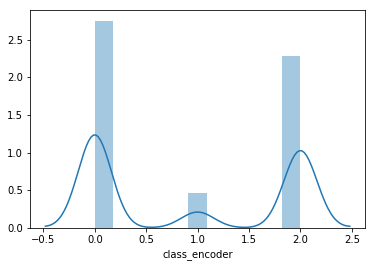

In [29]:
sns.distplot(df['class_encoder'])

### Heatmap for the features used

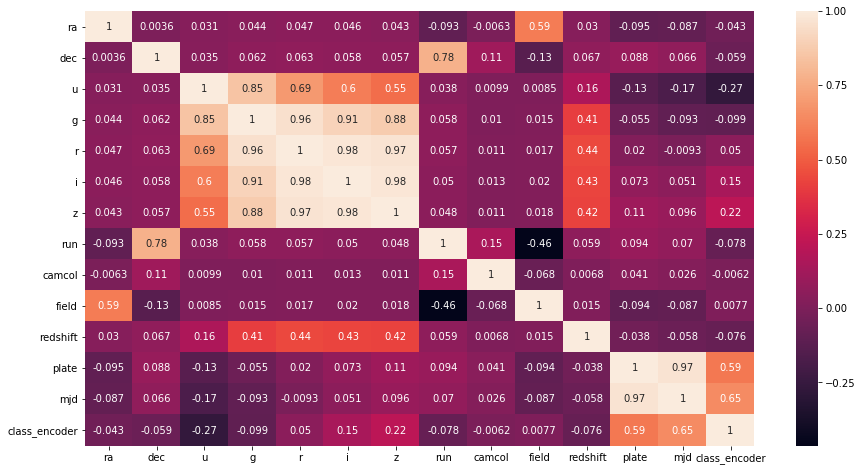

In [30]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [31]:
all_X = df.iloc[:, :13]  # all rows, features only, no labels
all_y = df.iloc[:, -1]  # all rows, label only, no features

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y)

In [32]:
clf = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### SVM's SVC

RBF kernel used with 'ovo' decision function. The model was able to achieve an accuracy of close to 80%. 

In [33]:
clf.score(X_test, y_test)

0.7964

In [34]:
y_pred = clf.predict(X_test)

### Confusion Matrix

In [35]:
confusion_matrix(y_test, y_pred)

array([[1167,   10,   78],
       [ 107,   48,   50],
       [ 257,    7,  776]], dtype=int64)

In [43]:
model = Sequential()
model.add(Dense(32,input_dim=13,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:,:13],df.iloc[:,-1])


start = timeit.default_timer()

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(xtrain, ytrain, epochs=20, batch_size=50)

Epoch 1/20
7500/7500 [==============================] - 1s 162us/step - loss: 9.3635 - acc: 0.4191
Epoch 2/20
7500/7500 [==============================] - 1s 89us/step - loss: 9.3635 - acc: 0.4191
Epoch 3/20
7500/7500 [==============================] - 1s 90us/step - loss: 9.3635 - acc: 0.4191
Epoch 4/20
7500/7500 [==============================] - 1s 90us/step - loss: 9.3635 - acc: 0.4191
Epoch 5/20
7500/7500 [==============================] - 1s 105us/step - loss: 9.3635 - acc: 0.4191
Epoch 6/20
7500/7500 [==============================] - 1s 98us/step - loss: 9.3635 - acc: 0.4191
Epoch 7/20
7500/7500 [==============================] - 1s 92us/step - loss: 9.3635 - acc: 0.4191
Epoch 8/20
7500/7500 [==============================] - 1s 101us/step - loss: 9.3635 - acc: 0.4191
Epoch 9/20
7500/7500 [==============================] - 1s 100us/step - loss: 9.3635 - acc: 0.4191
Epoch 10/20
7500/7500 [==============================] - 1s 98us/step - loss: 9.3635 - acc: 0.4191
Epoch 11/20
750